## **Imports**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.preprocessing import LabelBinarizer , StandardScaler , MinMaxScaler
from sklearn import tree

from sklearn.metrics import accuracy_score

from sklearn.cluster import *

## **Read Data**

In [3]:
df = pd.read_excel('Pistachio_28_Features_Dataset.xls')
df.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio


In [4]:
df.shape

(2148, 29)

In [5]:
df.dtypes

Area               int64
Perimeter        float64
Major_Axis       float64
Minor_Axis       float64
Eccentricity     float64
Eqdiasq          float64
Solidity         float64
Convex_Area        int64
Extent           float64
Aspect_Ratio     float64
Roundness        float64
Compactness      float64
Shapefactor_1    float64
Shapefactor_2    float64
Shapefactor_3    float64
Shapefactor_4    float64
Mean_RR          float64
Mean_RG          float64
Mean_RB          float64
StdDev_RR        float64
StdDev_RG        float64
StdDev_RB        float64
Skew_RR          float64
Skew_RG          float64
Skew_RB          float64
Kurtosis_RR      float64
Kurtosis_RG      float64
Kurtosis_RB      float64
Class             object
dtype: object

### ***Casting int feature to float***

In [6]:
columns = df.select_dtypes('int').columns
df[columns] = df[columns].astype('float')
df.dtypes

Area             float64
Perimeter        float64
Major_Axis       float64
Minor_Axis       float64
Eccentricity     float64
Eqdiasq          float64
Solidity         float64
Convex_Area      float64
Extent           float64
Aspect_Ratio     float64
Roundness        float64
Compactness      float64
Shapefactor_1    float64
Shapefactor_2    float64
Shapefactor_3    float64
Shapefactor_4    float64
Mean_RR          float64
Mean_RG          float64
Mean_RB          float64
StdDev_RR        float64
StdDev_RG        float64
StdDev_RB        float64
Skew_RR          float64
Skew_RG          float64
Skew_RB          float64
Kurtosis_RR      float64
Kurtosis_RG      float64
Kurtosis_RB      float64
Class             object
dtype: object

### ***Casting object feature to category***

In [7]:
columns = df.select_dtypes('object').columns
df[columns] = df[columns].astype('category')
df.dtypes

Area              float64
Perimeter         float64
Major_Axis        float64
Minor_Axis        float64
Eccentricity      float64
Eqdiasq           float64
Solidity          float64
Convex_Area       float64
Extent            float64
Aspect_Ratio      float64
Roundness         float64
Compactness       float64
Shapefactor_1     float64
Shapefactor_2     float64
Shapefactor_3     float64
Shapefactor_4     float64
Mean_RR           float64
Mean_RG           float64
Mean_RB           float64
StdDev_RR         float64
StdDev_RG         float64
StdDev_RB         float64
Skew_RR           float64
Skew_RG           float64
Skew_RB           float64
Kurtosis_RR       float64
Kurtosis_RG       float64
Kurtosis_RB       float64
Class            category
dtype: object

In [8]:
df['Class'].value_counts()

Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: Class, dtype: int64

## **Encode Categorical Feature**

In [9]:
lb = LabelBinarizer()
df['Class'] = lb.fit_transform(df['Class'])
df.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391.0,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160.0,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,0
1,68358.0,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991.0,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,0
2,73589.0,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234.0,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,0
3,71106.0,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153.0,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,0
4,80087.0,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929.0,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,0


## **Missing Values**

In [10]:
df.isnull().sum()

Area             0
Perimeter        0
Major_Axis       0
Minor_Axis       0
Eccentricity     0
Eqdiasq          0
Solidity         0
Convex_Area      0
Extent           0
Aspect_Ratio     0
Roundness        0
Compactness      0
Shapefactor_1    0
Shapefactor_2    0
Shapefactor_3    0
Shapefactor_4    0
Mean_RR          0
Mean_RG          0
Mean_RB          0
StdDev_RR        0
StdDev_RG        0
StdDev_RB        0
Skew_RR          0
Skew_RG          0
Skew_RB          0
Kurtosis_RR      0
Kurtosis_RG      0
Kurtosis_RB      0
Class            0
dtype: int64

## **Correlation**

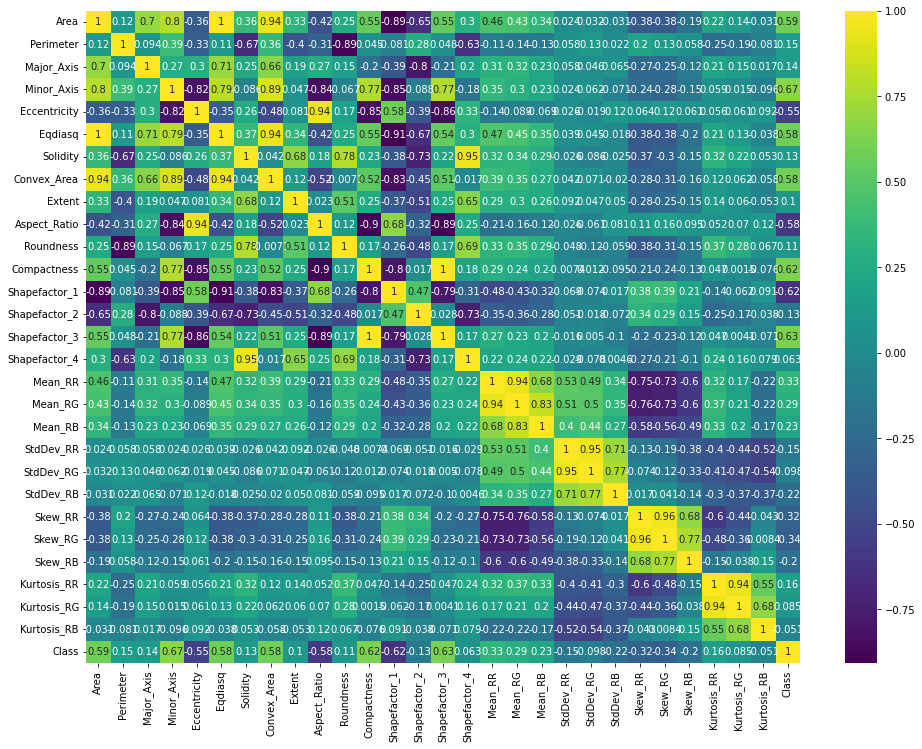

In [11]:
corr = df.corr()
plt.figure(figsize=(16 , 12))
sns.heatmap(corr , annot=True , cmap='viridis');

In [12]:
correlation = corr['Class'].abs().sort_values()

In [13]:
correlation

Kurtosis_RB      0.051275
Shapefactor_4    0.063084
Kurtosis_RG      0.084705
StdDev_RG        0.098064
Extent           0.100200
Roundness        0.105768
Solidity         0.125347
Shapefactor_2    0.126188
Major_Axis       0.136845
Perimeter        0.145290
StdDev_RR        0.148107
Kurtosis_RR      0.155714
Skew_RB          0.200009
StdDev_RB        0.217357
Mean_RB          0.229117
Mean_RG          0.292409
Skew_RR          0.317073
Mean_RR          0.332455
Skew_RG          0.337884
Eccentricity     0.546759
Eqdiasq          0.577300
Aspect_Ratio     0.581469
Convex_Area      0.584618
Area             0.589226
Shapefactor_1    0.615513
Compactness      0.624939
Shapefactor_3    0.626304
Minor_Axis       0.668126
Class            1.000000
Name: Class, dtype: float64

## **EDA**

In [14]:
features = df.iloc[: , :-1].columns
target = 'Class'

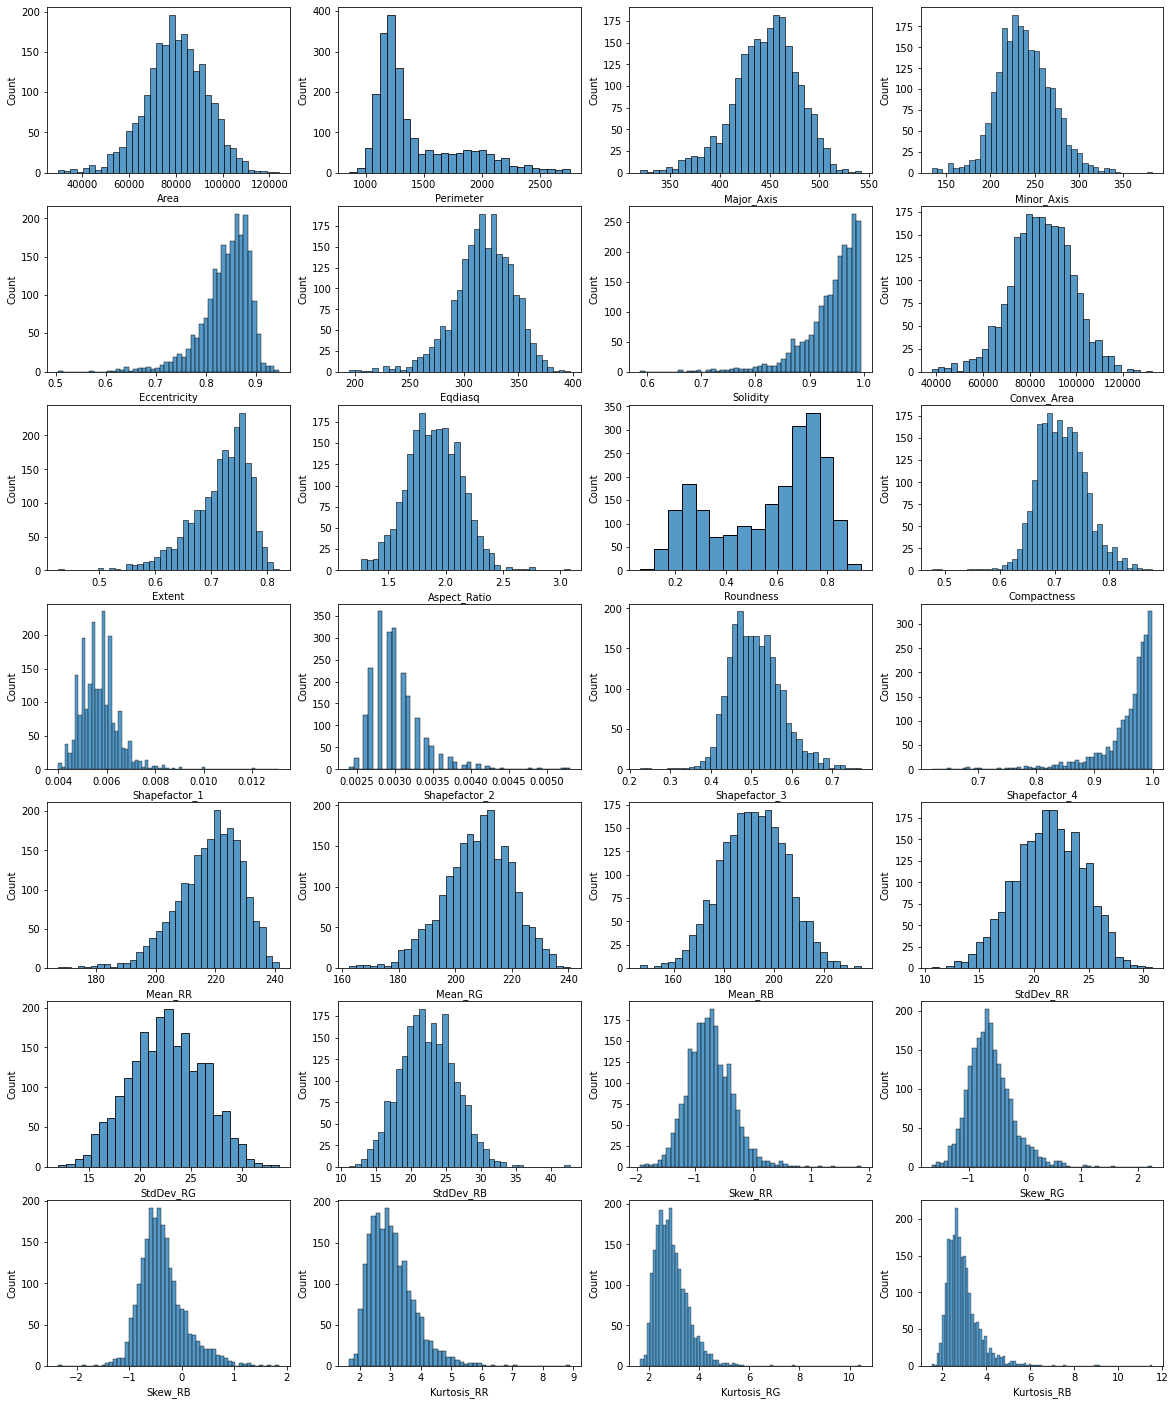

In [15]:
fig , axes = plt.subplots(7 , 4 , figsize=(20 , 25))
ax_flat = axes.flatten()

for i,ax in enumerate(ax_flat):
    sns.histplot(df[features[i]] , ax=ax)

In [16]:
corr_columns = correlation[correlation>0.3].index
corr_columns

Index(['Skew_RR', 'Mean_RR', 'Skew_RG', 'Eccentricity', 'Eqdiasq',
       'Aspect_Ratio', 'Convex_Area', 'Area', 'Shapefactor_1', 'Compactness',
       'Shapefactor_3', 'Minor_Axis', 'Class'],
      dtype='object')

In [17]:
target = corr_columns[-1]
features = corr_columns[:-1]

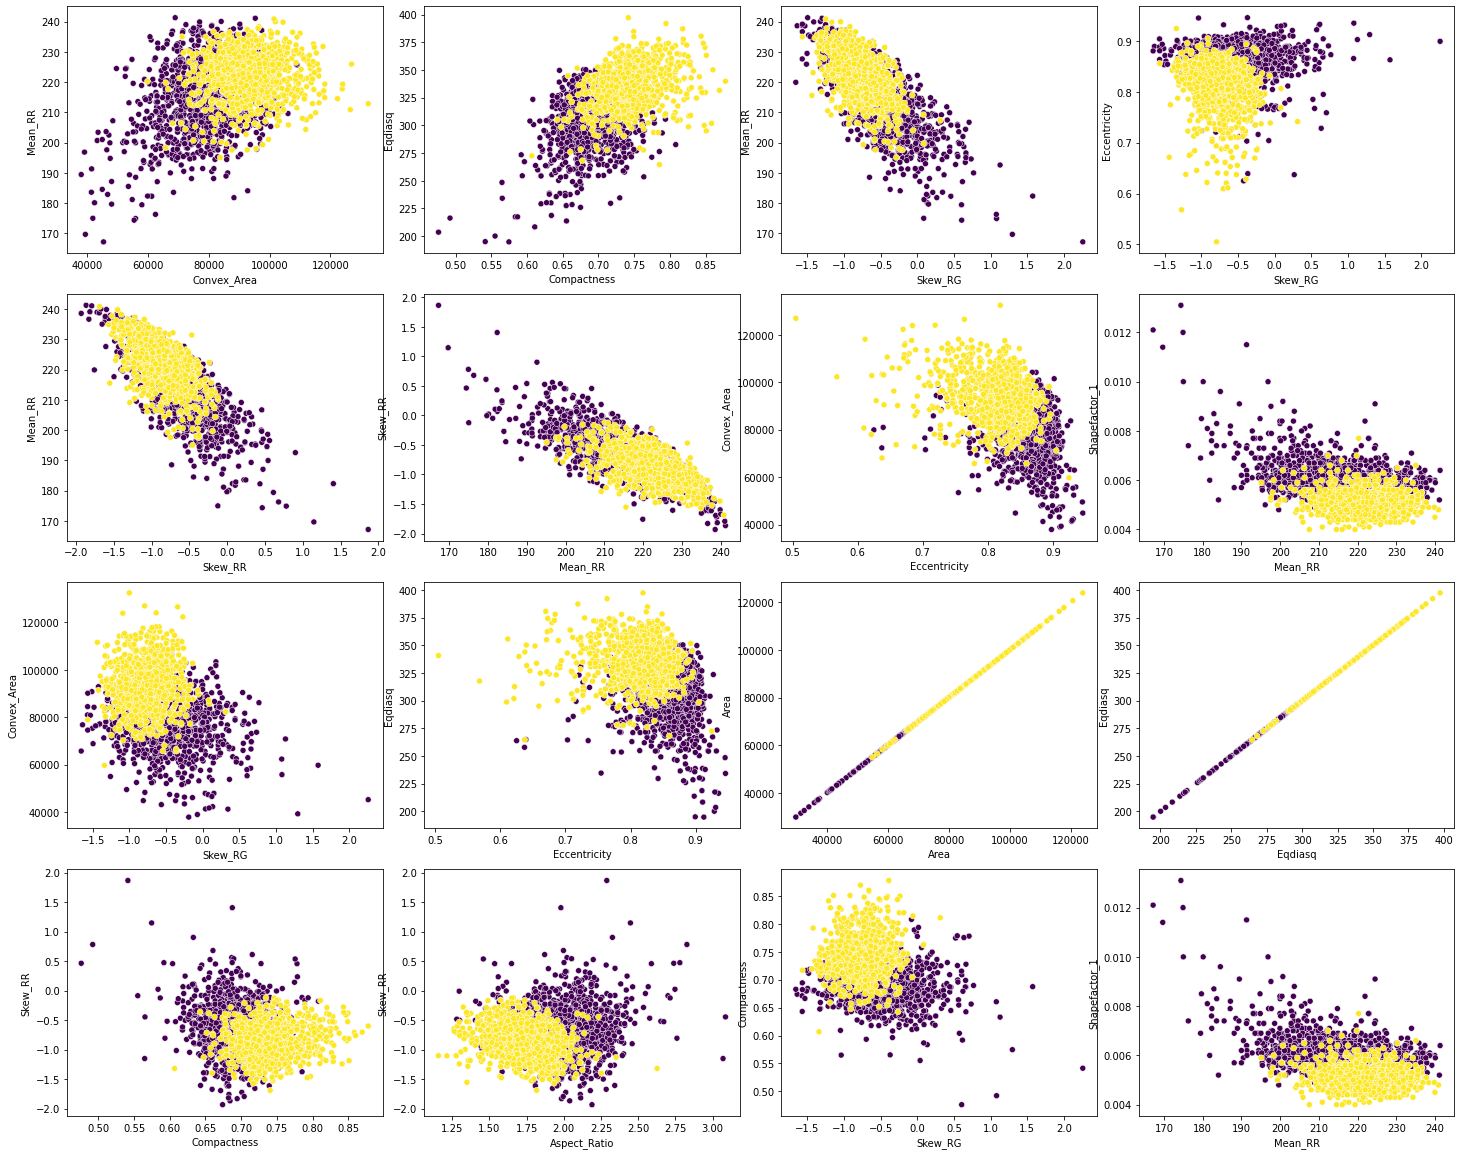

In [18]:
fig , axes = plt.subplots(4 , 4 , figsize=(20 , 16))
ax_flat = axes.flatten()
plt.tight_layout(h_pad = 2)
for i,ax in enumerate(ax_flat):
    x_random = np.random.randint(0 , 11)
    y_random = np.random.randint(0 , 11)
    sns.scatterplot(x=df[features[x_random]] , y=df[features[y_random]] , c=df[target] , ax=ax)

In [19]:
features = df.drop('Class' , axis=1).columns
target = 'Class'

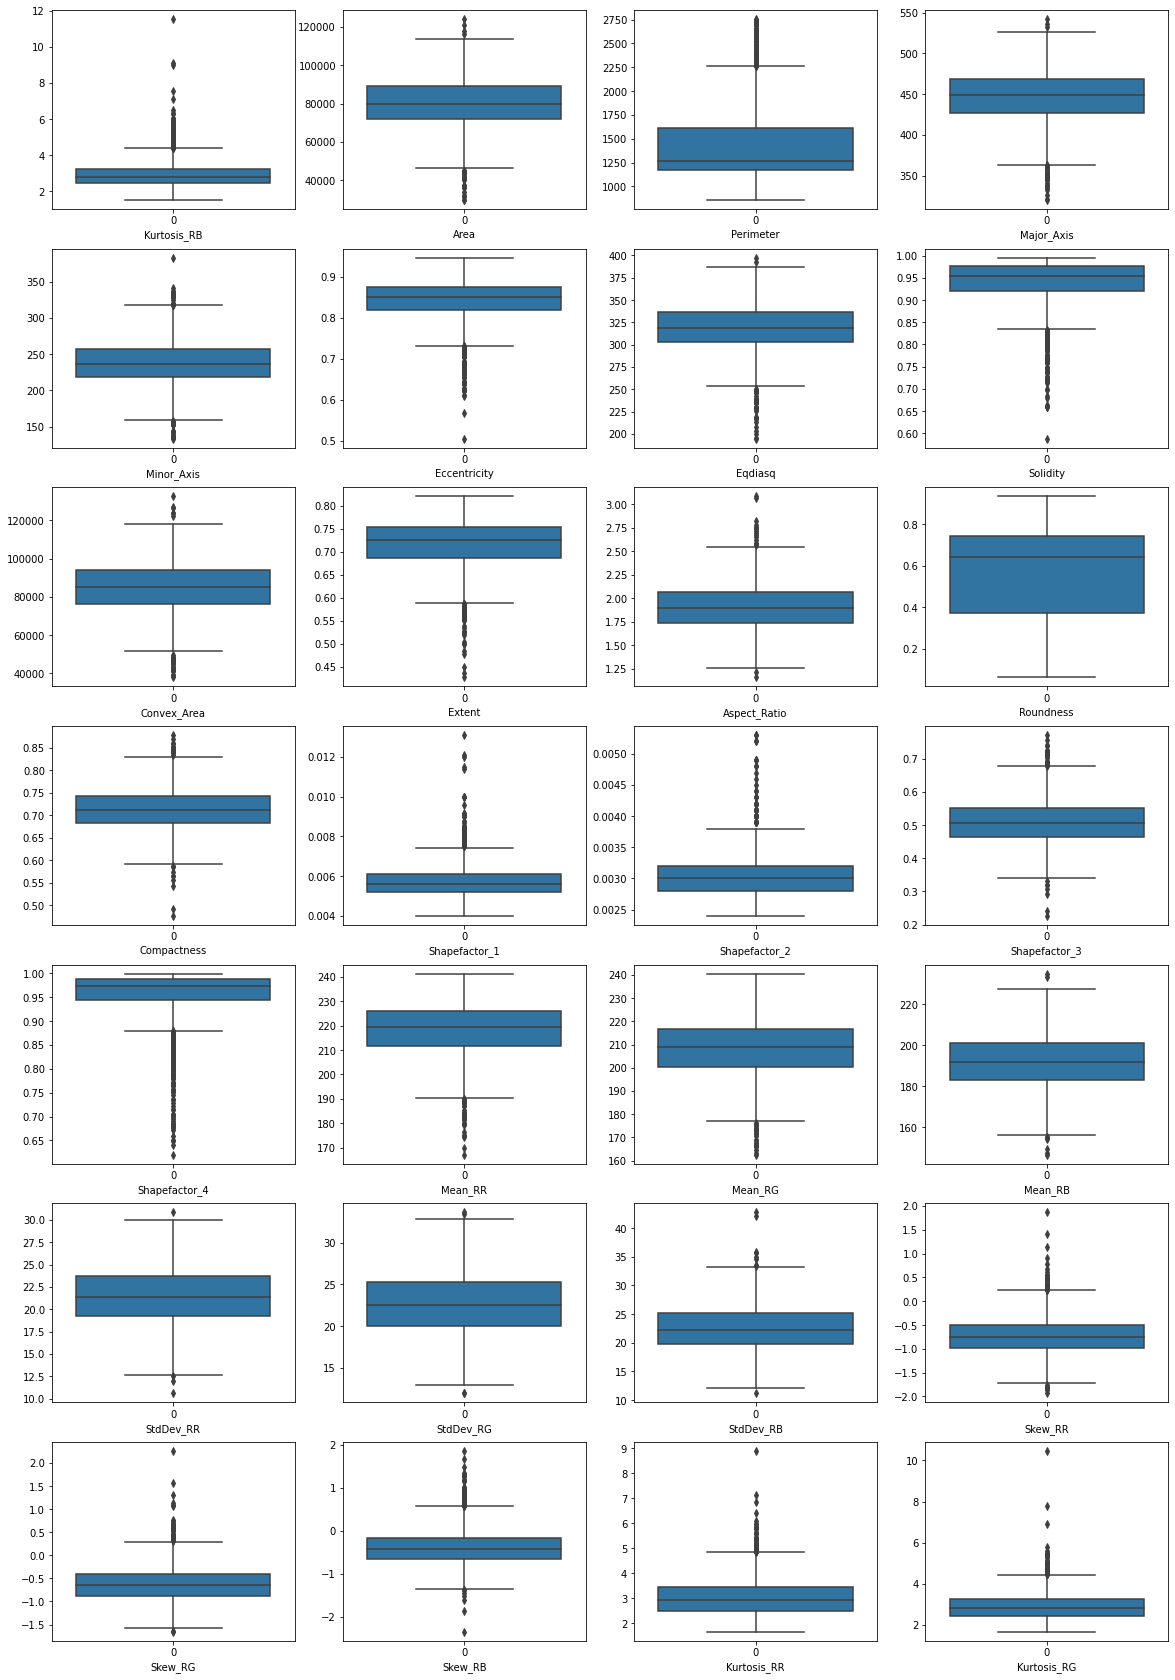

In [20]:
fig , axes = plt.subplots(7 , 4 , figsize=(20 , 30))
ax_flat = axes.flatten()
for i , ax in enumerate(ax_flat):
    sns.boxplot(df[features[i-1]] , ax=ax)
    ax.set_xlabel(f'{features[i-1]}')

## **Split Data to X , y**

In [21]:
X = df.drop('Class' , axis=1).values
y = df['Class'].values
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=2 , stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1718, 28)
(430, 28)
(1718,)
(430,)


## **Normalization**

### *StandardScaler*

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.09603377, -0.64223414,  0.5264525 , ...,  0.21460959,
         0.33024371,  0.29192998],
       [-0.03727552,  2.05117616, -0.14055833, ..., -1.01559161,
        -0.96625785, -0.63541236],
       [-1.06512236, -0.59528576, -0.9270025 , ..., -0.95637449,
        -0.81098539, -0.68868404],
       ...,
       [-0.52585225,  2.78404778,  0.61478365, ..., -0.93117279,
        -0.87708216, -0.91519246],
       [-1.33448859, -1.14444897, -1.79995379, ...,  0.42751579,
         0.49839013,  0.04355942],
       [ 2.49770111, -0.27043281,  2.38295562, ...,  2.28762187,
         1.71105398,  0.6079625 ]])

### *Normalize*

In [23]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_train_norm

array([[0.51834395, 0.17261997, 0.66192718, ..., 0.28048959, 0.23533365,
        0.21379739],
       [0.52646497, 0.70844868, 0.56273569, ..., 0.11705514, 0.09997213,
        0.12517356],
       [0.38440552, 0.18195991, 0.44578321, ..., 0.12492224, 0.11618339,
        0.12008251],
       ...,
       [0.45893843, 0.85424661, 0.67506295, ..., 0.12827034, 0.10928254,
        0.09843566],
       [0.34717622, 0.07270904, 0.31596622, ..., 0.30877456, 0.25288901,
        0.19006122],
       [0.8768259 , 0.24658636, 0.93800863, ..., 0.55589301, 0.37949743,
        0.24399984]])

## **DecisionTreeClassifier**

In [24]:
clf = tree.DecisionTreeClassifier(class_weight='balanced' , random_state=0)
clf_norm = tree.DecisionTreeClassifier(class_weight='balanced' , random_state=0)
clf.fit(X_train , y_train)
clf_norm.fit(X_train_norm , y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

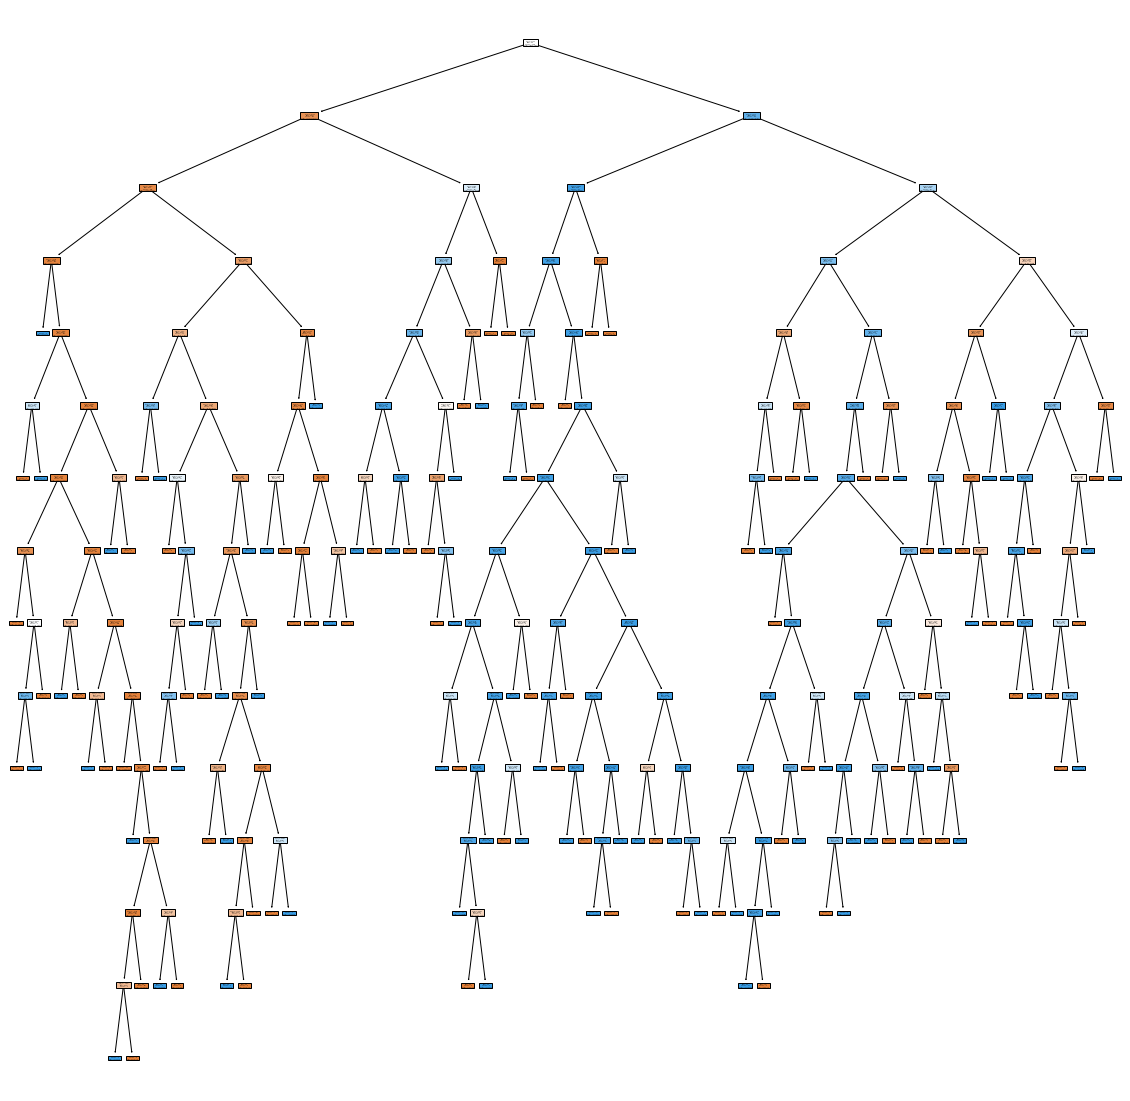

In [25]:
plt.figure(figsize=(20 , 20))
tree.plot_tree(clf , filled=True);

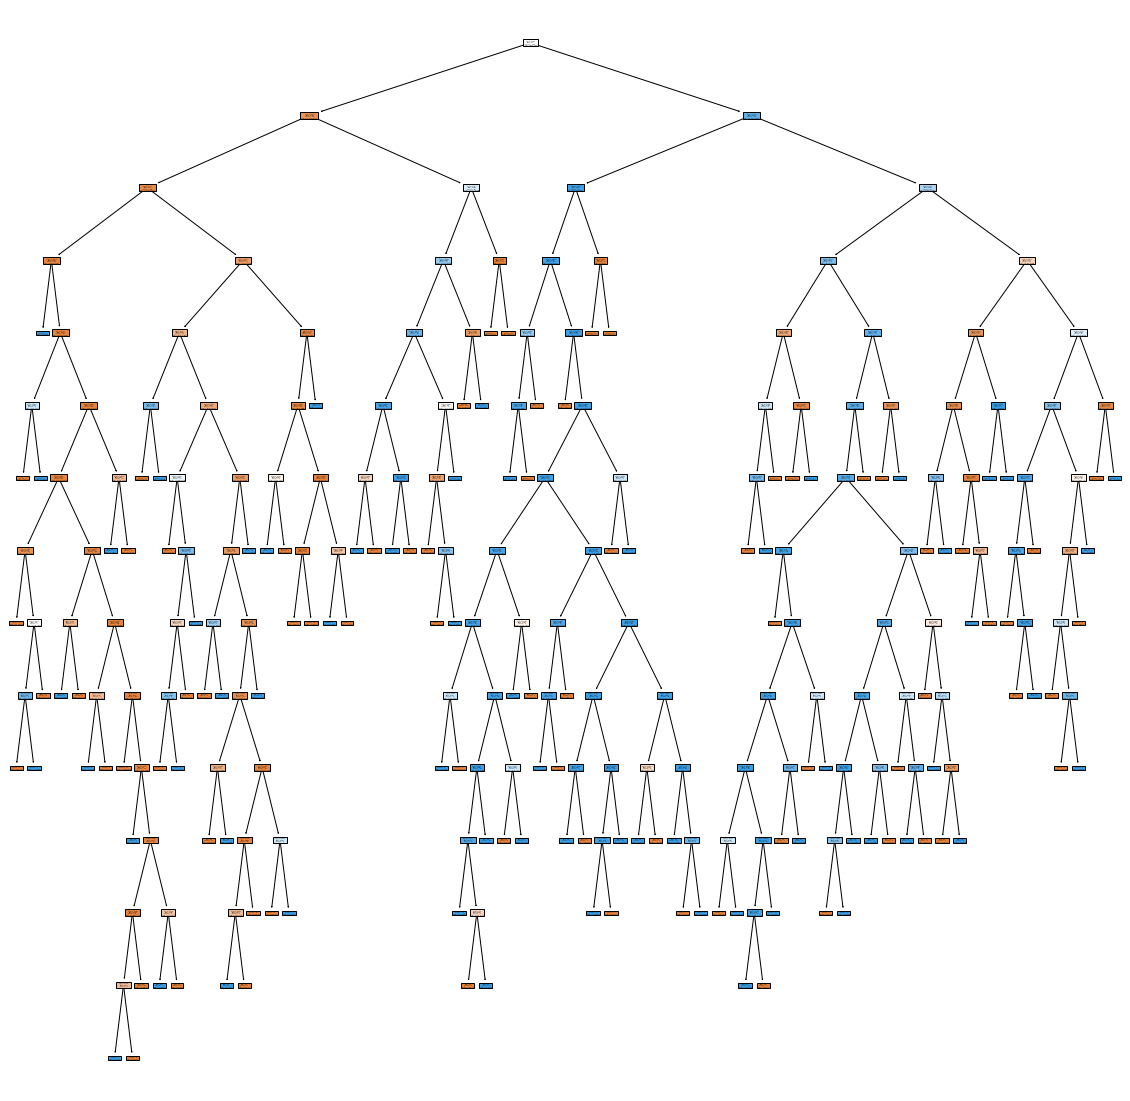

In [26]:
plt.figure(figsize=(20 , 20))
tree.plot_tree(clf_norm , filled=True);

## **Test_data**

In [27]:
X_test = scaler.transform(X_test)
X_test

array([[-1.70685457, -0.4897651 , -1.5647414 , ..., -0.89633109,
        -0.92182701, -0.80588173],
       [ 1.10923994, -0.63479189,  0.71666695, ...,  0.54484831,
         0.65067961,  0.53767155],
       [ 0.85093408,  1.58076199,  0.96184903, ..., -1.04244589,
        -0.99891374, -0.98105562],
       ...,
       [-0.16861748, -0.50983178, -0.25127756, ...,  1.34235141,
         1.46943181,  0.47969536],
       [ 0.33593535, -0.31946018,  1.88854986, ..., -0.49654669,
        -0.73232865, -1.1000521 ],
       [-0.46033489, -0.85660758, -0.25056856, ..., -0.89963623,
        -1.03722161, -0.9443881 ]])

In [28]:
X_test_norm = norm_scaler.transform(X_test)
X_test_norm

array([[0.29571125, 0.20295225, 0.35094476, ..., 0.13289912, 0.10461095,
        0.10888222],
       [0.68492569, 0.17410054, 0.69021406, ..., 0.3243624 , 0.26878883,
        0.23728231],
       [0.64922505, 0.61486419, 0.7266752 , ..., 0.1134875 , 0.09656269,
        0.09214128],
       ...,
       [0.5083121 , 0.19896018, 0.54627058, ..., 0.43031212, 0.35427082,
        0.23174167],
       [0.57804671, 0.23683282, 0.86448531, ..., 0.1860112 , 0.12439556,
        0.08076908],
       [0.46799363, 0.12997238, 0.54637602, ..., 0.13246002, 0.09256315,
        0.0956455 ]])

### *score*

In [29]:
print(f'score for standardization is {clf.score(X_train , y_train)}')
print(f'score for standardization is {clf.score(X_test , y_test)}')

score for standardization is 1.0
score for standardization is 0.8418604651162791


In [30]:
print(f'score for normalization is {clf_norm.score(X_train_norm , y_train)}')
print(f'score for normalization is {clf_norm.score(X_test_norm , y_test)}')

score for normalization is 1.0
score for normalization is 0.8418604651162791


Overfitttt !!!!

## **DecisionTreeClassifier with "max_depth" PrePruning**

In [31]:
clf.tree_.max_depth , clf_norm.tree_.max_depth

(14, 14)

In [32]:
prepruning_clf = tree.DecisionTreeClassifier(max_depth=7 , class_weight='balanced' , random_state=0)
prepruning_clf_norm =  tree.DecisionTreeClassifier(max_depth=7 , class_weight='balanced' , random_state=0)

In [33]:
prepruning_clf.fit(X_train , y_train)
prepruning_clf_norm.fit(X_train_norm , y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=0)

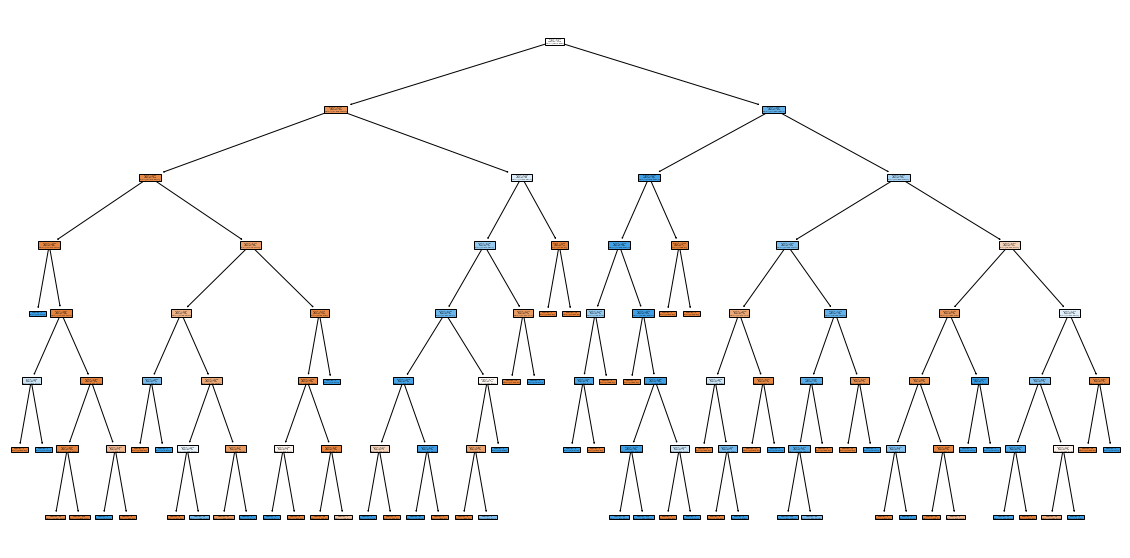

In [34]:
plt.figure(figsize=(20 , 10))
tree.plot_tree(prepruning_clf , filled=True);

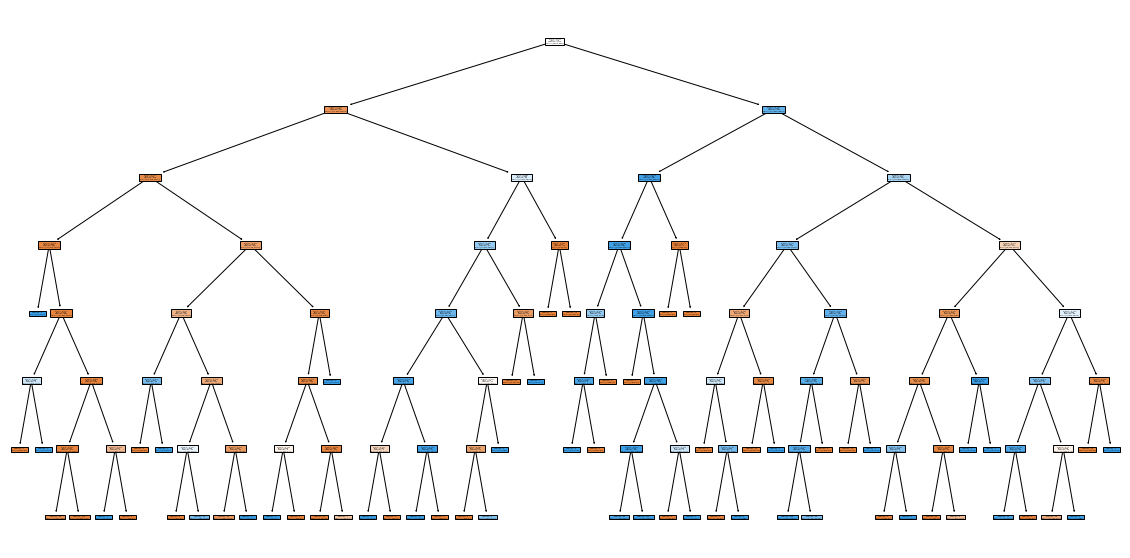

In [35]:
plt.figure(figsize=(20 , 10))
tree.plot_tree(prepruning_clf_norm , filled=True);

### *score*

In [36]:
print(f'score for standardization is {prepruning_clf.score(X_train , y_train)}')
print(f'score for standardization is {prepruning_clf.score(X_test , y_test)}')

score for standardization is 0.9551804423748544
score for standardization is 0.8558139534883721


In [37]:
print(f'score for normalization is {prepruning_clf_norm.score(X_train_norm , y_train)}')
print(f'score for normalization is {prepruning_clf_norm.score(X_test_norm , y_test)}')

score for normalization is 0.9551804423748544
score for normalization is 0.8558139534883721


## **DecisionTreeClassifier with "max_depth" PrePruning and "min_leaf_size"**

In [38]:
clf_PrePruning2 = tree.DecisionTreeClassifier(max_depth=7 , min_samples_leaf=20 , class_weight='balanced' , random_state=0)
clf_PrePruning_norm2 = tree.DecisionTreeClassifier(max_depth=7 , min_samples_leaf=20 , class_weight='balanced' , random_state=0)

In [39]:
clf_PrePruning2.fit(X_train , y_train)
clf_PrePruning_norm2.fit(X_train_norm , y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=20, random_state=0)

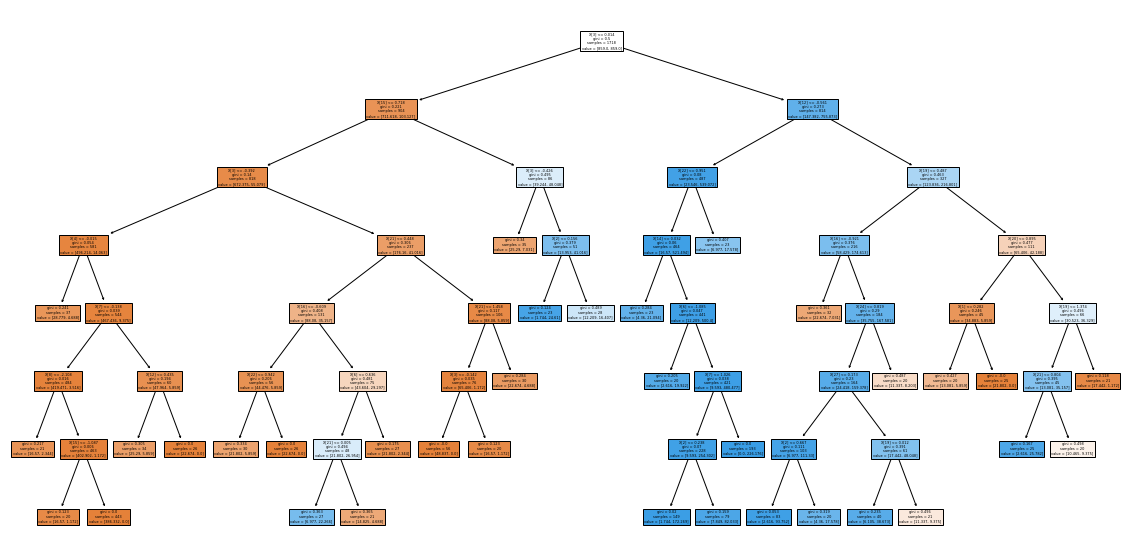

In [40]:
plt.figure(figsize=(20 , 10))
tree.plot_tree(clf_PrePruning2 , filled=True);

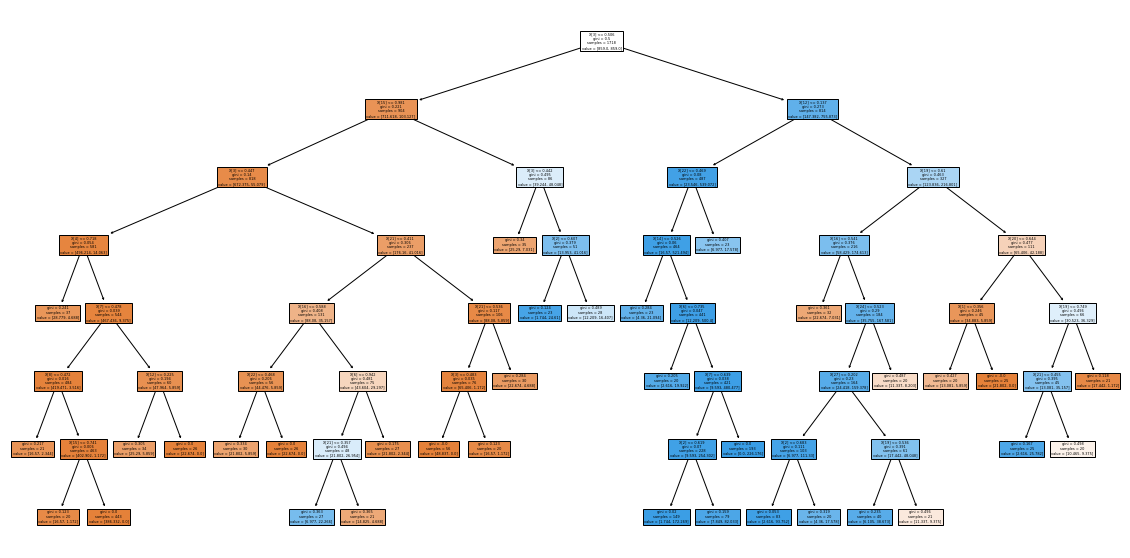

In [41]:
plt.figure(figsize=(20 , 10))
tree.plot_tree(clf_PrePruning_norm2 , filled=True);

#### *Score*

In [42]:
print(f'score for standardization is {clf_PrePruning2.score(X_train , y_train)}')
print(f'score for standardization is {clf_PrePruning2.score(X_test , y_test)}')

score for standardization is 0.919674039580908
score for standardization is 0.8627906976744186


In [43]:
print(f'score for normalization is {clf_PrePruning_norm2.score(X_train_norm , y_train)}')
print(f'score for normalization is {clf_PrePruning_norm2.score(X_test_norm , y_test)}')

score for normalization is 0.919674039580908
score for normalization is 0.8627906976744186


## **DecisionTreeClassifier with "max_depth" PrePruning and "min_leaf_size" and "min_sample_split"**

In [44]:
clf_PrePruning3 = tree.DecisionTreeClassifier(max_depth=7 , min_samples_leaf=20 , min_samples_split=30 , class_weight='balanced' , random_state=0)
clf_PrePruning_norm3 = tree.DecisionTreeClassifier(max_depth=7 , min_samples_leaf=20 , min_samples_split=30 , class_weight='balanced' , random_state=0)

In [45]:
clf_PrePruning3.fit(X_train , y_train)
clf_PrePruning_norm3.fit(X_train_norm , y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=20, min_samples_split=30,
                       random_state=0)

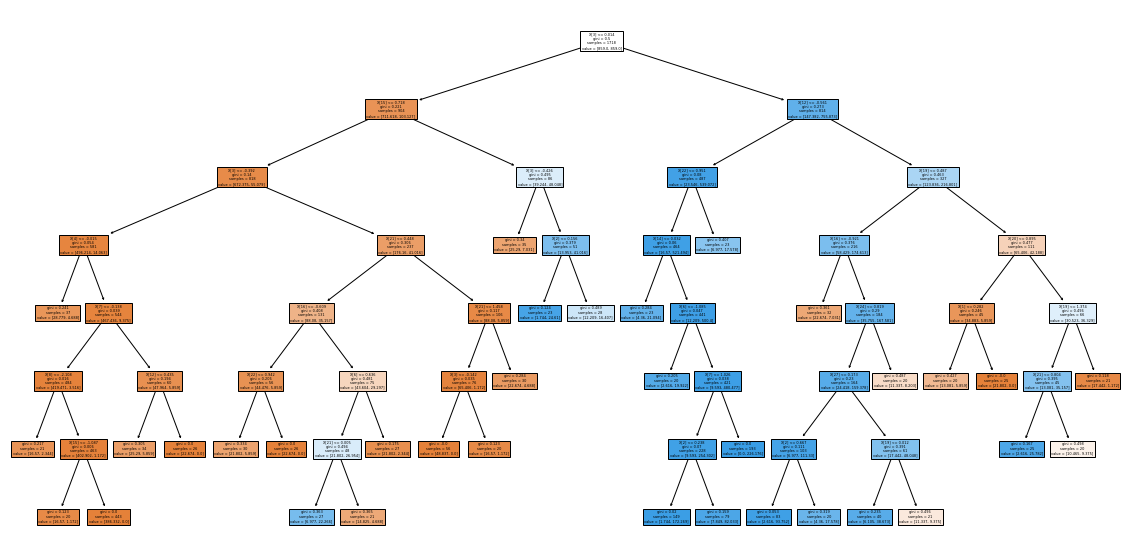

In [46]:
plt.figure(figsize=(20 , 10))
tree.plot_tree(clf_PrePruning3 , filled=True);

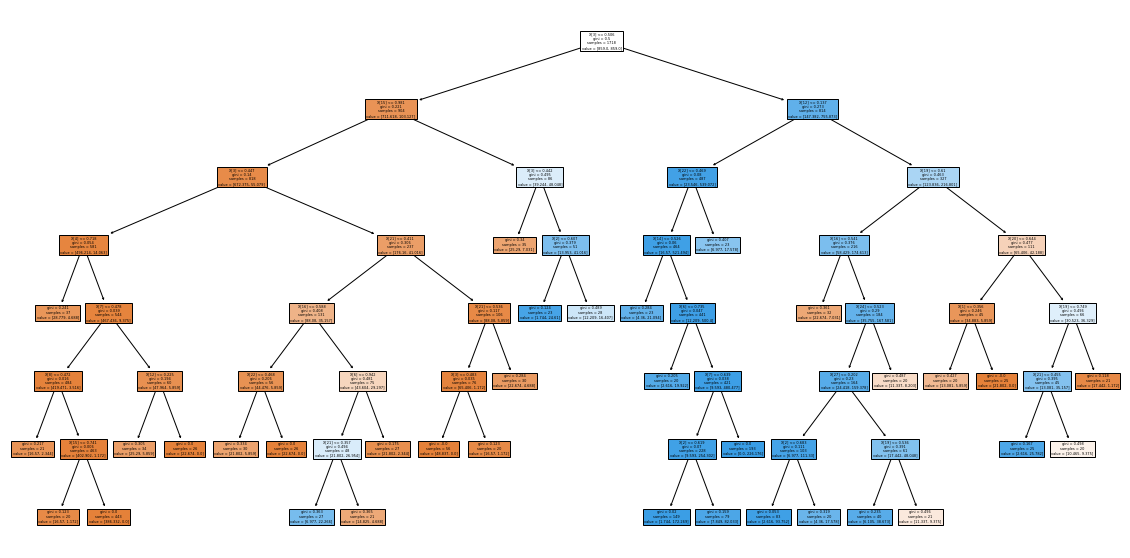

In [47]:
plt.figure(figsize=(20 , 10))
tree.plot_tree(clf_PrePruning_norm3 , filled=True);

#### *Score*

In [48]:
print(f'score for standardization is {clf_PrePruning3.score(X_train , y_train)}')
print(f'score for standardization is {clf_PrePruning3.score(X_test , y_test)}')

score for standardization is 0.919674039580908
score for standardization is 0.8627906976744186


In [49]:
print(f'score for normalization is {clf_PrePruning_norm3.score(X_train_norm , y_train)}')
print(f'score for normalization is {clf_PrePruning_norm3.score(X_test_norm , y_test)}')

score for normalization is 0.919674039580908
score for normalization is 0.8627906976744186


## **DecisionTreeClassifier with "max_depth" PrePruning and "min_leaf_size" and "min_sample_split" , "Max Feature"**

In [50]:
clf_PrePruning3.tree_.n_features , clf_PrePruning_norm3.tree_.n_features

(28, 28)

In [51]:
clf_PrePruning4 = tree.DecisionTreeClassifier(max_depth=7 , min_samples_leaf=20 , min_samples_split=70 , max_features=12 , class_weight='balanced' , random_state=0)
clf_PrePruning_norm4 = tree.DecisionTreeClassifier(max_depth=7 , min_samples_leaf=20 , min_samples_split=70 , max_features=12 , class_weight='balanced',random_state=0)

In [52]:
clf_PrePruning4.fit(X_train , y_train)
clf_PrePruning_norm4.fit(X_train_norm , y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_features=12,
                       min_samples_leaf=20, min_samples_split=70,
                       random_state=0)

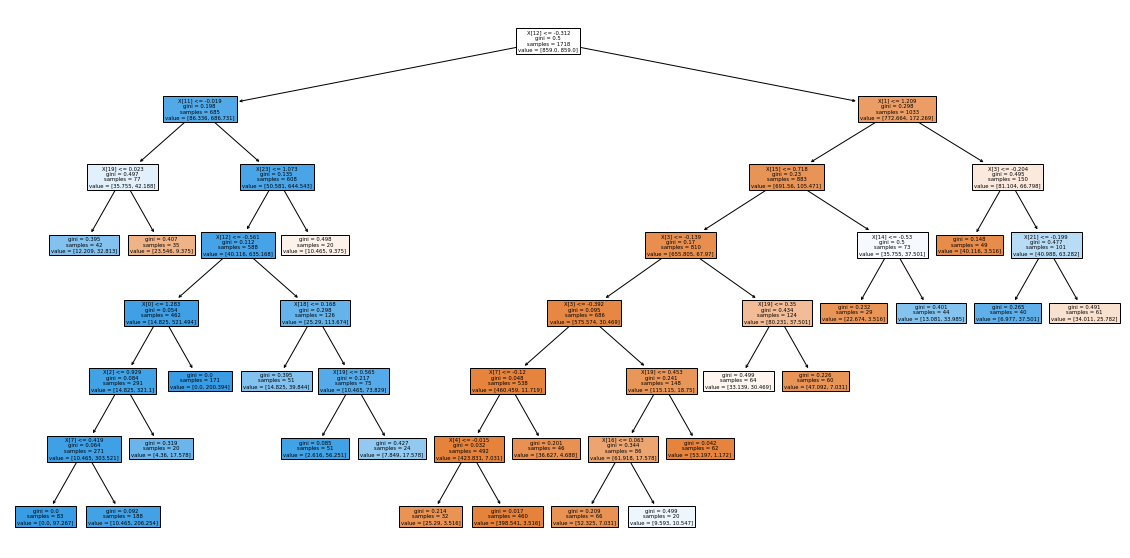

In [53]:
plt.figure(figsize=(20 , 10))
tree.plot_tree(clf_PrePruning4 , filled=True);

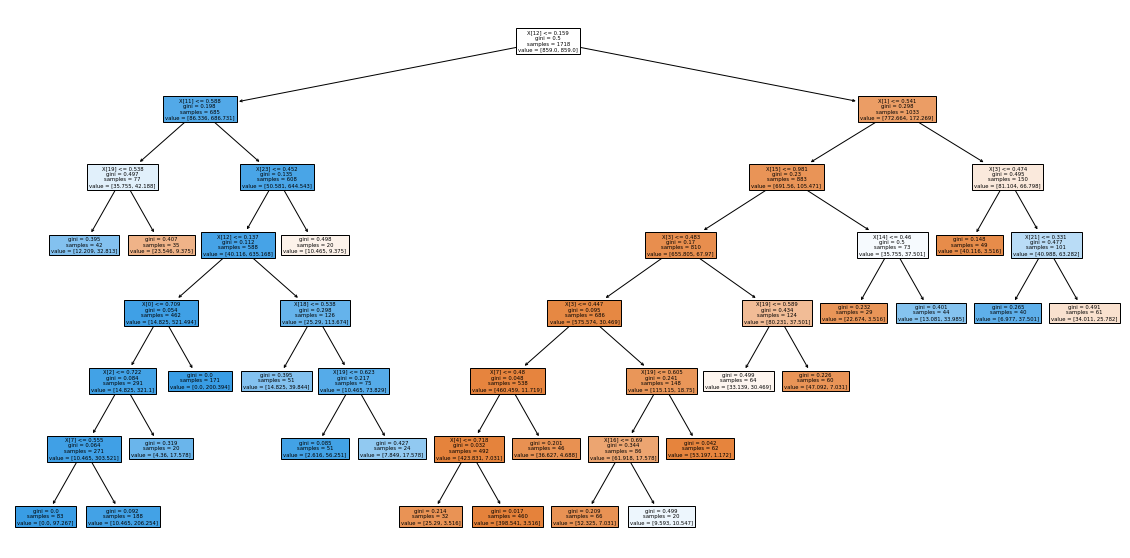

In [54]:
plt.figure(figsize=(20 , 10))
tree.plot_tree(clf_PrePruning_norm4 , filled=True);

In [55]:
clf_PrePruning4.tree_.node_count

45

#### *Score*

In [56]:
print(f'score for standardization is {clf_PrePruning4.score(X_train , y_train)}')
print(f'score for standardization is {clf_PrePruning4.score(X_test , y_test)}')

score for standardization is 0.8911525029103609
score for standardization is 0.8604651162790697


In [57]:
print(f'score for normalization is {clf_PrePruning_norm4.score(X_train_norm , y_train)}')
print(f'score for normalization is {clf_PrePruning_norm4.score(X_test_norm , y_test)}')

score for normalization is 0.8911525029103609
score for normalization is 0.8604651162790697


## **PostPruning with ccp_alpha=0.01**

In [58]:
postpruning_clf = tree.DecisionTreeClassifier(ccp_alpha=0.01 , class_weight='balanced' ,  random_state=0)
postpruning_clf.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', random_state=0)

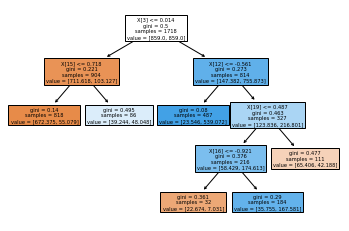

In [59]:
tree.plot_tree(postpruning_clf , filled=True);

In [60]:
print(postpruning_clf.score(X_train , y_train))
print(postpruning_clf.score(X_test , y_test))

0.8824214202561118
0.8441860465116279


In [61]:
postpruning_clf.tree_.node_count

11

## **PostPruning with ccp_alpha=0.005**

In [62]:
postpruning_clf2 = tree.DecisionTreeClassifier(ccp_alpha=0.005 , random_state=0 , class_weight='balanced')
postpruning_clf2.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight='balanced', random_state=0)

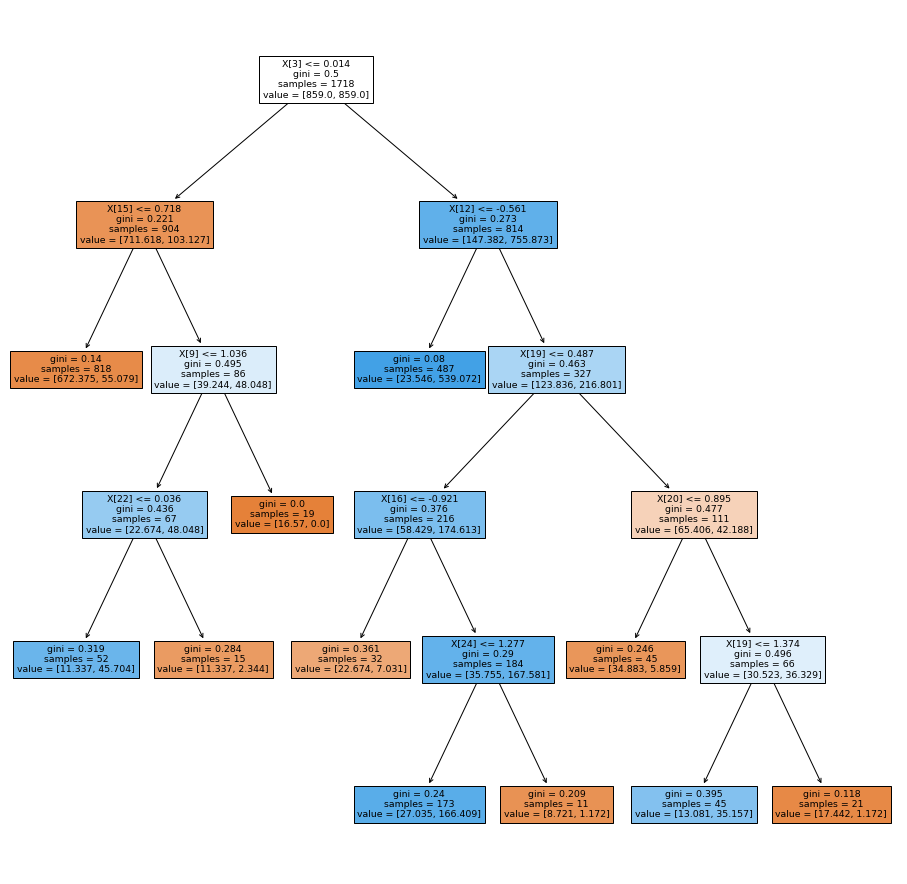

In [63]:
plt.figure(figsize=(16 , 16))
tree.plot_tree(postpruning_clf2 , filled=True);

In [64]:
print(postpruning_clf2.score(X_train , y_train))
print(postpruning_clf2.score(X_test , y_test))

0.9138533178114087
0.8488372093023255


In [65]:
postpruning_clf2.tree_.node_count

21

## **Tuning Hyperparameters with RandomSearchCV**

In [66]:
model=tree.DecisionTreeClassifier(random_state=0 ,  class_weight='balanced')

In [67]:
depth = np.arange(3 , 15)
min_sample_leaf = np.arange(2 , 200 , 2)
min_sample_split = np.arange(2 , 200 , 2)
max_feature = np.arange(5 , 29)
ccp_alpha = np.arange(0.0001 , 0.01001 , 0.0001)

In [68]:
param_distr = {'max_depth': depth, 'min_samples_split': min_sample_split , 'min_samples_leaf':min_sample_leaf , 'max_features':max_feature , 'ccp_alpha':ccp_alpha}

In [69]:
random_search = RandomizedSearchCV(model, param_distr, n_iter=250, random_state=31)
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=0),
                   n_iter=250,
                   param_distributions={'ccp_alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 ,...
                                        'min_samples_split': array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
      

In [70]:
print(random_search.best_params_)

{'min_samples_split': 32, 'min_samples_leaf': 22, 'max_features': 26, 'max_depth': 13, 'ccp_alpha': 0.004200000000000001}


In [71]:
print(f'Best score is: {random_search.best_score_}')

Best score is: 0.8806681808936199


In [72]:
best_model = random_search.best_estimator_

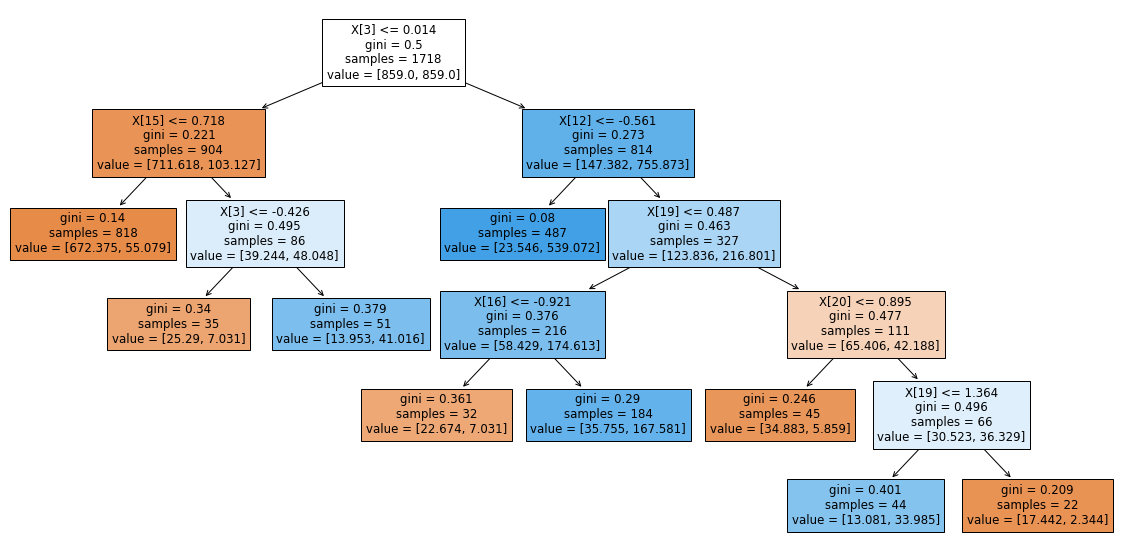

In [73]:
plt.figure(figsize=(20 , 10))
tree.plot_tree(best_model , filled=True);

In [74]:
print(best_model.score(X_train , y_train))
print(best_model.score(X_test , y_test))

0.9039580908032596
0.8465116279069768


In [75]:
best_model.tree_.node_count

17

## **K-Means**

In [76]:
n = 5
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, 
                tol=0.0001, random_state=111, algorithm='elkan')

kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels.shape, centroids.shape

((2148,), (2, 28))

In [80]:
labels = np.where(labels==0 , 1 , 0)
accuracy_score(y , labels)

0.765828677839851